In [5]:
import math
import numpy as np
import cvxopt
from cvxopt import matrix
from cvxopt.solvers import qp

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
mu = np.array([0.05, 0.06, 0.08, 0.06])
vol = np.array([0.15, 0.2, 0.25, 0.3])
rho = np.array([[1, 0.1, 0.4, 0.5],
              [0.1, 1, 0.7, 0.4],
              [0.4, 0.7, 1, 0.8],
              [0.5, 0.4, 0.8, 1]])

1. Represent the efficient frontier

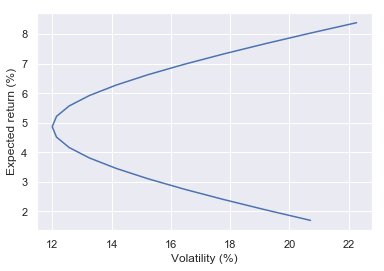

In [44]:
sigma = vol * rho * vol.reshape((vol.shape[0],1))
vec_one = np.ones(vol.shape)
vec_zero = np.zeros(vol.shape)

cvxopt.solvers.options['show_progress'] = False

P = matrix(sigma)
q = matrix(mu)
A = matrix(vec_one).trans()
b = matrix(1.0)
G = matrix()

gamma = np.arange(-1,1,0.1)
s_result, exp_returns = np.zeros(gamma.size), np.zeros(gamma.size)
for i in range(gamma.size):
    x = np.array(qp(P=P,q=matrix(gamma[i]*q),A=A,b=b)['x'])
    x = x.reshape((x.shape[0],))
    exp_returns[i] = np.dot(x,mu)
    s_result[i] = math.sqrt(np.dot(x,np.dot(sigma,x)))

ax = plt.axes()
p = plt.plot(s_result*100,exp_returns*100)
a = ax.set(xlabel='Volatility (%)',ylabel='Expected return (%)')

2. Calculate the minimum variance portfolio. What are its expected return and its volatility ?